In [10]:
pip install beautifulsoup4 requests lxml


In [11]:
import requests

In [13]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'lxml')  # 'html.parser' is slower, 'lxml' is faster

In [17]:

url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
soup = BeautifulSoup(requests.get(url).text , 'html')

In [18]:
table = soup.find_all('table')[0]


In [19]:

table_titles = table.find_all('th')
table_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [20]:

table_titles = [table_title.text.strip() for table_title in table_titles]
table_titles

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [21]:

import pandas as pd
df = pd.DataFrame(columns = table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [22]:
 column_datas = table.find_all('tr')[1:]


In [23]:
for column_data in column_datas:
  row_data = column_data.find_all('td')
  row_data = [rd.text.strip() for rd in row_data]
  length = len(df)
  df.loc[length] = row_data

In [24]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [25]:
!pip install beautifulsoup4 requests lxml
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [26]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
soup = BeautifulSoup(requests.get(url).text, 'lxml')
table = soup.find_all('table')[0]

# Extract headers
headers = [th.text.strip() for th in table.find_all('th')]

# Create DataFrame
df = pd.DataFrame(columns=headers)
rows = table.find_all('tr')[1:]
for row in rows:
    cells = row.find_all('td')
    values = [cell.text.strip() for cell in cells]
    if values:
        df.loc[len(df)] = values

df.head()


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"


In [27]:
# Clean numeric columns
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype(float)
df['Revenue growth'] = df['Revenue growth'].str.replace('%', '').astype(float)
df['Employees'] = df['Employees'].str.replace(',', '').astype(float)
df['Rank'] = df['Rank'].astype(int)


<ipython-input-28-03a671e5c915>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue (USD millions)', y='Name', data=top10, palette='Blues_r')


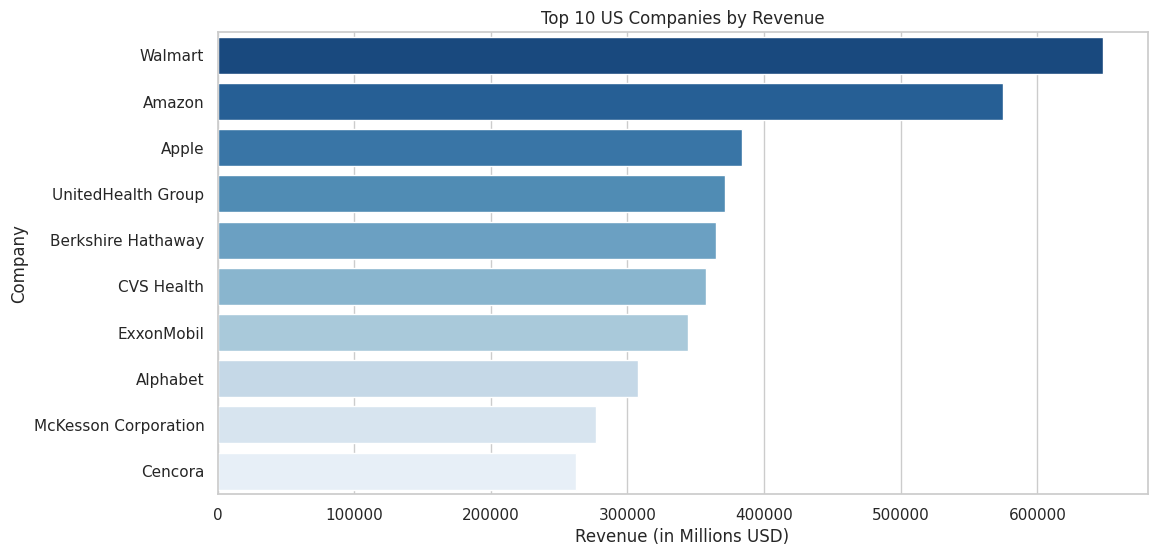

In [28]:
top10 = df.nlargest(10, 'Revenue (USD millions)')
plt.figure(figsize=(12,6))
sns.barplot(x='Revenue (USD millions)', y='Name', data=top10, palette='Blues_r')
plt.title("Top 10 US Companies by Revenue")
plt.xlabel("Revenue (in Millions USD)")
plt.ylabel("Company")
plt.show()


<ipython-input-29-13c606f51f42>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Industry', data=df, order=df['Industry'].value_counts().index[:15], palette='Set2')


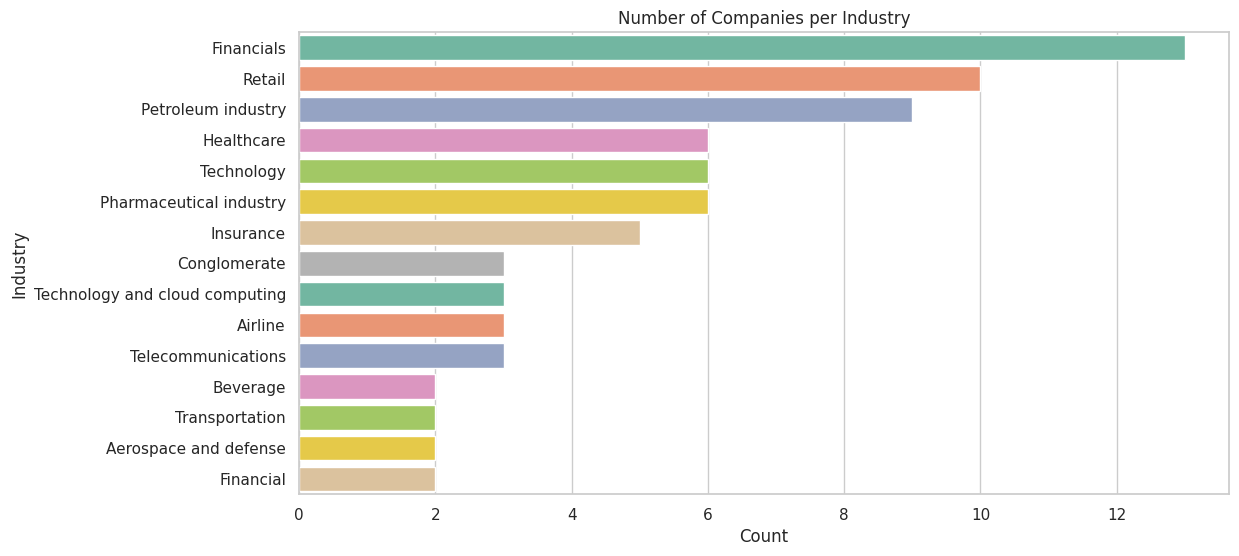

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(y='Industry', data=df, order=df['Industry'].value_counts().index[:15], palette='Set2')
plt.title("Number of Companies per Industry")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.show()


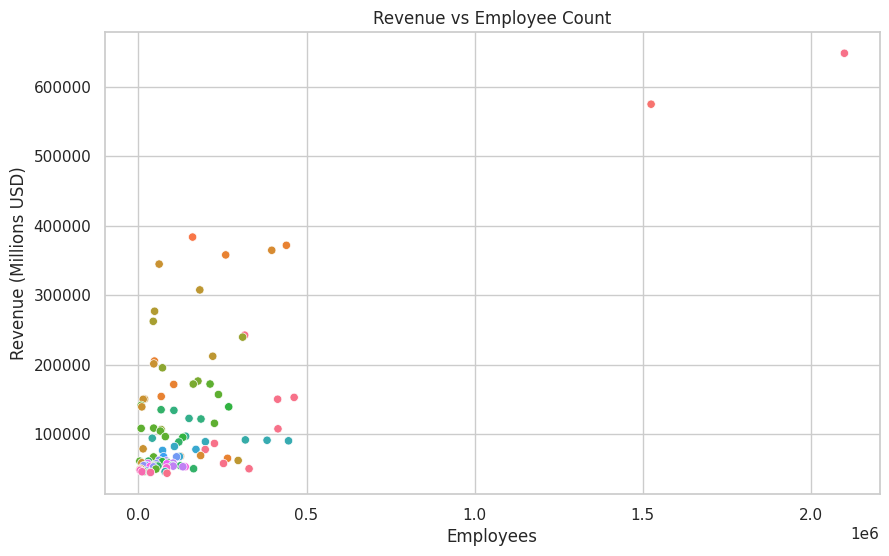

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Employees', y='Revenue (USD millions)', hue='Industry', legend=False)
plt.title("Revenue vs Employee Count")
plt.xlabel("Employees")
plt.ylabel("Revenue (Millions USD)")
plt.show()


<ipython-input-31-19b6038eeabe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue growth', y='Name', data=growth_top, palette='Greens')


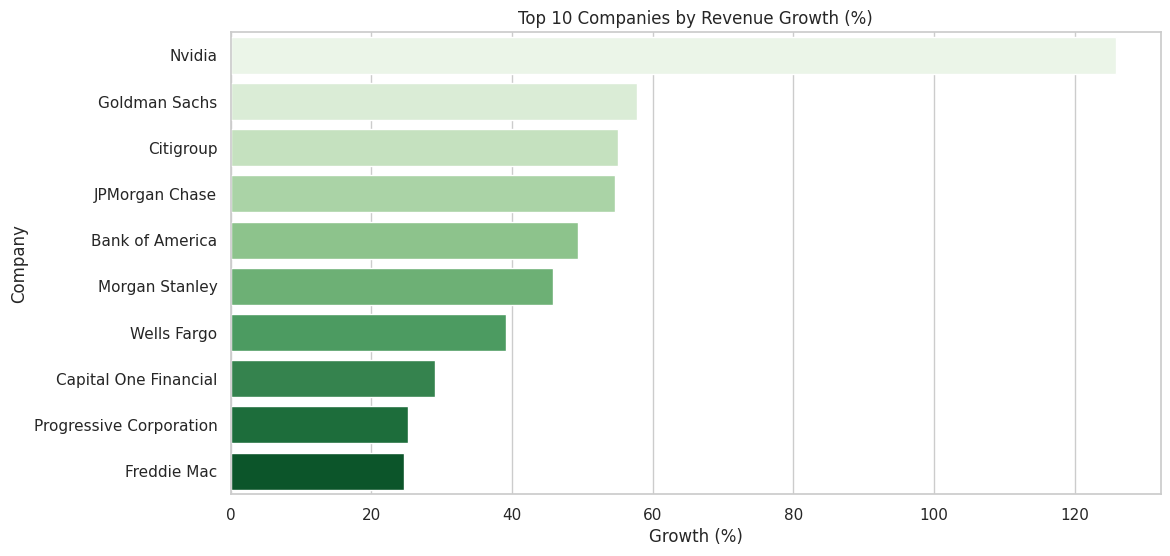

In [31]:
growth_top = df.sort_values('Revenue growth', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Revenue growth', y='Name', data=growth_top, palette='Greens')
plt.title("Top 10 Companies by Revenue Growth (%)")
plt.xlabel("Growth (%)")
plt.ylabel("Company")
plt.show()


In [32]:
print("Average Revenue by Industry:")
print(df.groupby("Industry")['Revenue (USD millions)'].mean().sort_values(ascending=False).head())

print("\nAverage Employees by Industry:")
print(df.groupby("Industry")['Employees'].mean().sort_values(ascending=False).head())


Average Revenue by Industry:
Industry
Retail and cloud computing    574785.0
Electronics industry          383482.0
Health                        276711.0
Pharmacy wholesale            262173.0
Financial services            239425.0
Name: Revenue (USD millions), dtype: float64

Average Employees by Industry:
Industry
Retail and cloud computing    1525000.0
Retail                         479975.0
Transportation                 414475.0
Financial services             309926.0
Conglomerate                   235500.0
Name: Employees, dtype: float64


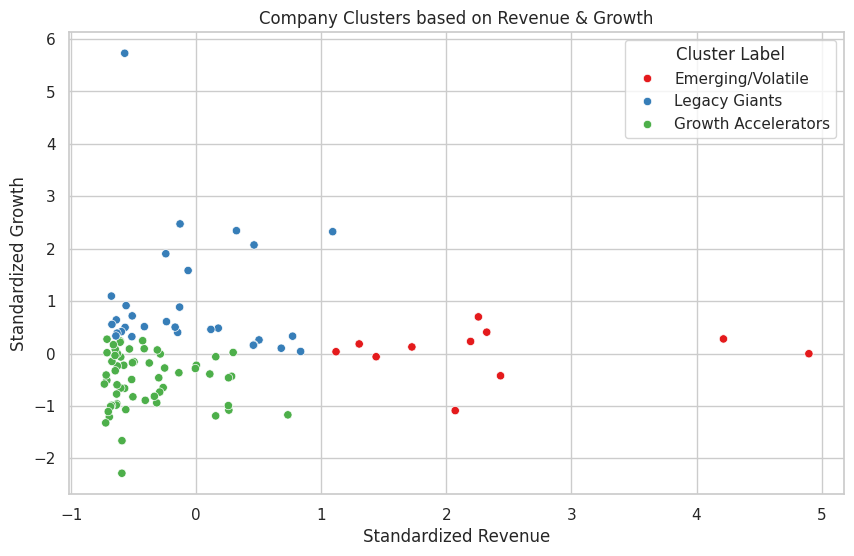

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cluster_df = df[['Revenue (USD millions)', 'Revenue growth']].dropna()
scaler = StandardScaler()
X = scaler.fit_transform(cluster_df)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
cluster_map = {
    0: "Legacy Giants",
    1: "Growth Accelerators",
    2: "Emerging/Volatile"
}

df['Cluster Label'] = df['Cluster'].map(cluster_map)


plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=df['Cluster Label'], palette='Set1')
plt.title("Company Clusters based on Revenue & Growth")
plt.xlabel("Standardized Revenue")
plt.ylabel("Standardized Growth")
plt.show()
